In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('jobs.csv')

In [3]:
# Simple statistics retrieved from the CSV file

import pandas as pd

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Assuming 'Salary' is a column with numerical values
# If 'Salary' contains non-numerical values or symbols, they should be cleaned or converted to numerical values first

# Calculate statistics
mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
std_dev_salary = df['Salary'].std()
min_salary = df['Salary'].min()
max_salary = df['Salary'].max()

# Display the results
print("Salary Statistics:")
print(f"Mean: {mean_salary}")
print(f"Median: {median_salary}")
print(f"Standard Deviation: {std_dev_salary}")
print(f"Minimum: {min_salary}")
print(f"Maximum: {max_salary}")

# If you need more statistics, you can add them here using similar methods


Salary Statistics:
Mean: 27.360367762128327
Median: 21.5
Standard Deviation: 15.885060048807812
Minimum: 15.5
Maximum: 250.0


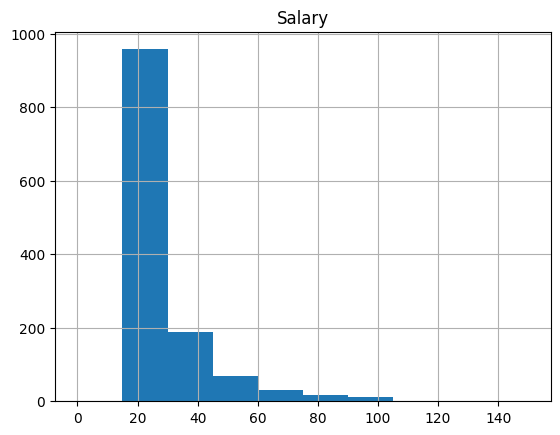

In [2]:
# Salary histogram
df.hist(range=(0, 150))
plt.show()





df = pd.read_csv('jobs.csv')

locations = set()

print(df['Location'])

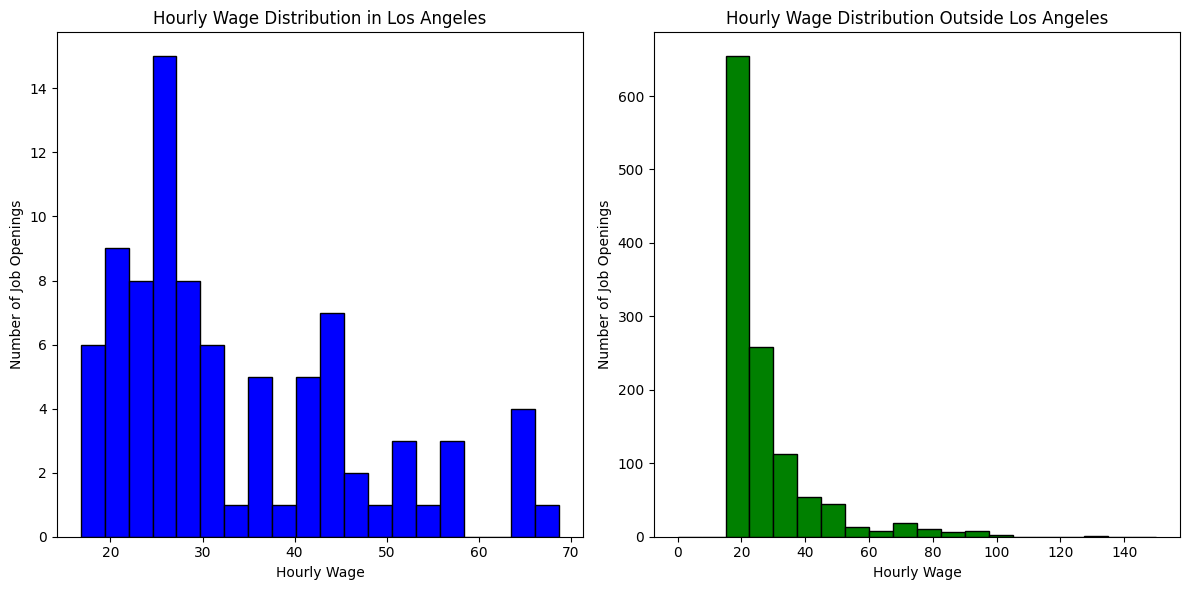

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Define the criterion for filtering jobs in LA - update this according to your data
la_criterion = df['Location'].str.contains('Los Angeles', case=False, na=False)

# Segment the data into two DataFrames
la_jobs = df[la_criterion]
non_la_jobs = df[~la_criterion]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for LA
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(la_jobs['Salary'], bins=20, color='blue', edgecolor='black')
plt.title('Hourly Wage Distribution in Los Angeles')
plt.xlabel('Hourly Wage')
plt.ylabel('Number of Job Openings')

# Plot for outside LA
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(non_la_jobs['Salary'], bins=20, color='green', edgecolor='black', range=(0, 150))
plt.title('Hourly Wage Distribution Outside Los Angeles')
plt.xlabel('Hourly Wage')
plt.ylabel('Number of Job Openings')

plt.tight_layout()
plt.show()


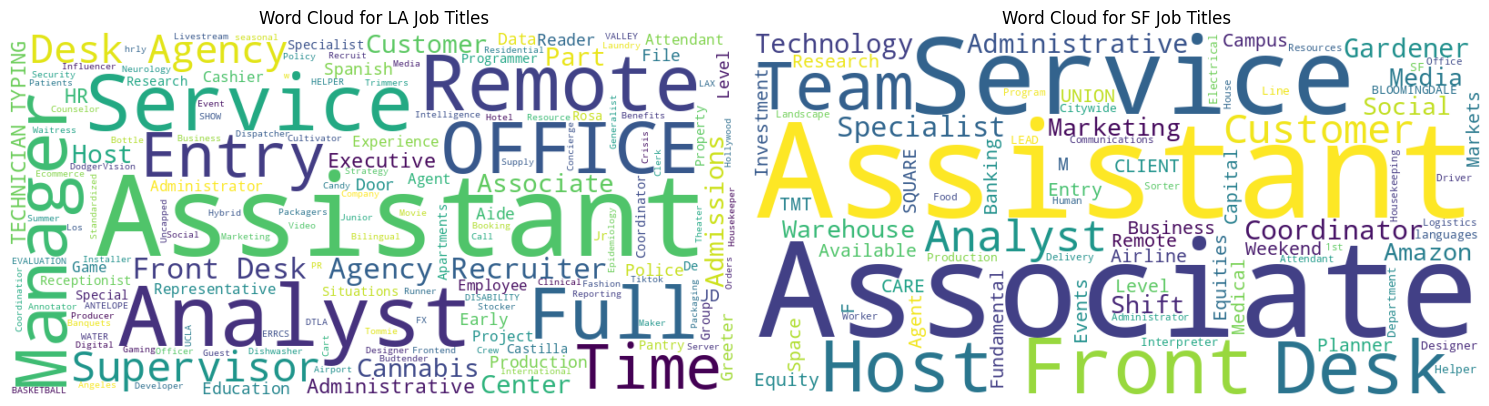

In [62]:
# Create word cloud for job titles in LA and SF

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Define the criterion for filtering jobs in LA - update this according to your data
la_criterion = df['Location'].str.contains('Los Angeles', case=False, na=False)
sf_criteria = df['Location'].str.contains('San Francisco', case=False, na=False)

# Segment the data into two DataFrames
la_jobs = df[la_criterion]
sf_jobs = df[sf_criteria]

# Combine job titles into single strings for each segment
la_titles = ' '.join(la_jobs['Title'])
sf_titles = ' '.join(sf_jobs['Title'])


# Create word clouds
wordcloud_la = WordCloud(width=800, height=400, background_color='white').generate(la_titles)
wordcloud_sf = WordCloud(width=800, height=400, background_color='white').generate(sf_titles)

# Plotting
plt.figure(figsize=(15, 7))

# Word cloud for LA
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.imshow(wordcloud_la, interpolation='bilinear')
plt.title('Word Cloud for LA Job Titles')
plt.axis('off')

# Word cloud for outside LA
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.imshow(wordcloud_sf, interpolation='bilinear')
plt.title('Word Cloud for SF Job Titles')
plt.axis('off')

plt.tight_layout()
plt.show()


In [48]:
# calculate number of outliers by z-index

import pandas as pd
from scipy import stats

# Load the dataset
df = pd.read_csv('jobs.csv')

# Calculate the Z-scores of the Salary column
df['Z_Score'] = stats.zscore(df['Salary'])

# Define the threshold
threshold = 3

# Identify outliers
outliers = df[(df['Z_Score'] > threshold) | (df['Z_Score'] < -threshold)]

with open('outliers.txt', 'w') as f:
    f.write(outliers.to_csv())
print(len(outliers))


30


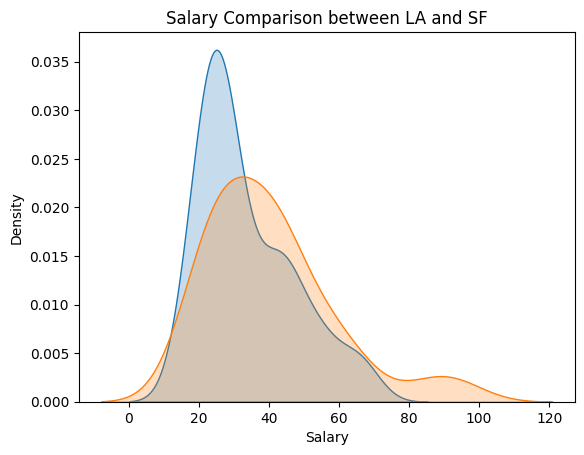

In [61]:
# salary data comparison between LA and SF

import pandas as pd

# Load the dataset
data = pd.read_csv('jobs.csv')

import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for LA and SF

la_data = data[data['Location'].str.contains('Los Angeles', case=False, na=False)]
sf_data = data[data['Location'].str.contains('San Francisco', case=False, na=False)]

plt.title('Salary Comparison between LA and SF')
sns.kdeplot(la_data['Salary'], label='LA', fill=True)
sns.kdeplot(sf_data['Salary'], label='SF', fill=True)


plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()


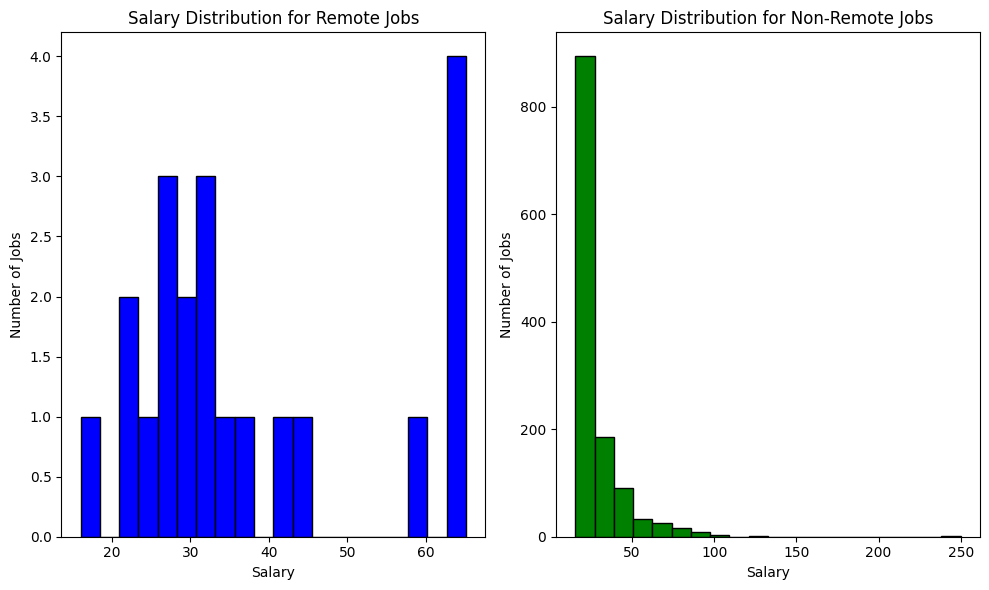

In [65]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Filter job titles for remote jobs using keywords
remote_keywords = ['remote', 'virtual', 'telecommute']
remote_condition = df['Title'].str.contains('|'.join(remote_keywords), case=False, na=False)e
remote_jobs = df[remote_condition]

# Filter job titles for non-remote jobs
non_remote_jobs = df[~remote_condition]

# Plotting
plt.figure(figsize=(10, 6))

# Plot for remote jobs
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(remote_jobs['Salary'], bins=20, color='blue', edgecolor='black')
plt.title('Salary Distribution for Remote Jobs')
plt.xlabel('Salary')
plt.ylabel('Number of Jobs')

# Plot for non-remote jobs
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(non_remote_jobs['Salary'], bins=20, color='green', edgecolor='black')
plt.title('Salary Distribution for Non-Remote Jobs')
plt.xlabel('Salary')
plt.ylabel('Number of Jobs')

plt.tight_layout()
plt.show()


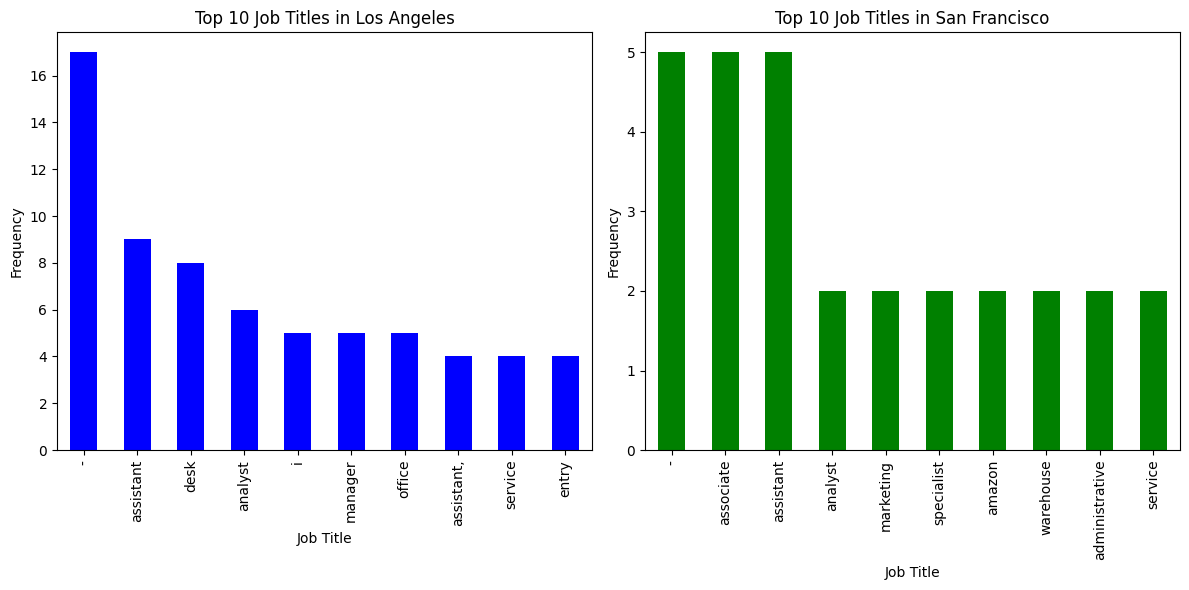

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Define the criterion for filtering jobs in LA and SF - update this according to your data
la_criterion = df['Location'].str.contains('Los Angeles', case=False, na=False)
sf_criterion = df['Location'].str.contains('San Francisco', case=False, na=False)

# Segment the data into two DataFrames
la_jobs = df[la_criterion]
sf_jobs = df[sf_criterion]

# Group job titles by similarity
la_grouped_titles = la_jobs['Title'].str.lower().str.replace('[^\w\s]', '').str.split().apply(set)
sf_grouped_titles = sf_jobs['Title'].str.lower().str.replace('[^\w\s]', '').str.split().apply(set)

# Count the frequency of each grouped title
la_title_counts = la_grouped_titles.explode().value_counts()
sf_title_counts = sf_grouped_titles.explode().value_counts()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for LA
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
la_title_counts[:10].plot(kind='bar', color='blue')
plt.title('Top 10 Job Titles in Los Angeles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')

# Plot for SF
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sf_title_counts[:10].plot(kind='bar', color='green')
plt.title('Top 10 Job Titles in San Francisco')
plt.xlabel('Job Title')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


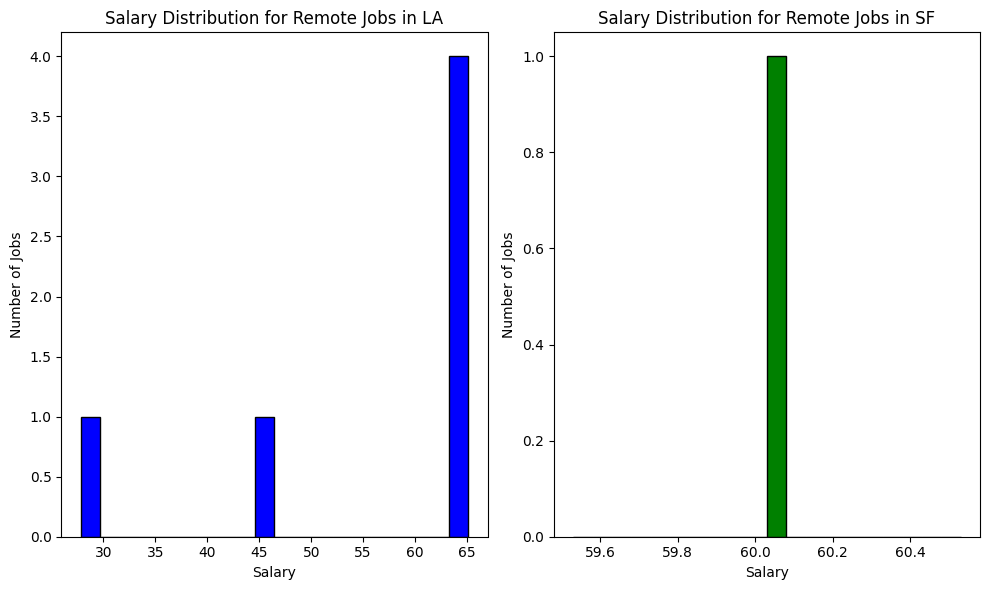

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('jobs.csv')

# Define the criterion for filtering remote jobs in LA and SF - update this according to your data
remote_keywords = ['remote', 'virtual', 'telecommute']
remote_condition = df['Title'].str.contains('|'.join(remote_keywords), case=False, na=False)
la_condition = df['Location'].str.contains('Los Angeles', case=False, na=False)
sf_condition = df['Location'].str.contains('San Francisco', case=False, na=False)

# Filter the data for remote jobs in LA and SF
remote_la_jobs = df[remote_condition & la_condition]
remote_sf_jobs = df[remote_condition & sf_condition]

# Plotting
plt.figure(figsize=(10, 6))

# Plot for remote jobs in LA
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(remote_la_jobs['Salary'], bins=20, color='blue', edgecolor='black')
plt.title('Salary Distribution for Remote Jobs in LA')
plt.xlabel('Salary')
plt.ylabel('Number of Jobs')

# Plot for remote jobs in SF
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(remote_sf_jobs['Salary'], bins=20, color='green', edgecolor='black')
plt.title('Salary Distribution for Remote Jobs in SF')
plt.xlabel('Salary')
plt.ylabel('Number of Jobs')

plt.tight_layout()
plt.show()
